#  Project 4 Jupyter Notebook
Beth Spornitz   
September 11, 2024

This code uses a combination of Python and Markdown to create an initial data story in a Jupyter Notebook. The project includes a project virtual environment with popular libraries for data analytics including pandas, matplotlib, and seaborn, and introduces a common process for starting exploratory data analysis projects.

Specific to the iris dataset, this file will walk through how to perform these functions:

1. Importing Requirements
2. Data Acquisition
3. Inital Data Inspection
4. Showing initial descriptive statistics
5. Showing initial data distribution for both categorical and numerical columns
6. Data Cleaning
7. Data Transformation

These steps will be followed by visulations and explanations of visualizations.  


### Import Dependencies

In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import requests
import jupyterlab
import pyarrow
import numpy as np


### Import Local Modules

In [62]:
import utils_bethspornitz
import bethspornitz_project_setup


### Data Acquisition

In [63]:
# Load the Iris dataset into DataFrame
df = sns.load_dataset('iris')

#Read the file
pd.read_csv('iris.csv')

# Inspect first rows of the DataFrame
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


### Initial Data Inspection

In [64]:
print(df.head(10))
print(df.shape)
print(df.dtypes)

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa
(150, 5)
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


### Initial Descriptive Statistics

In [65]:
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


### Initial Data Distribution for Numerical Columns

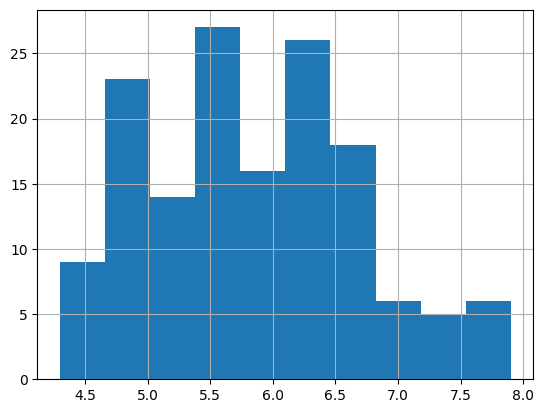

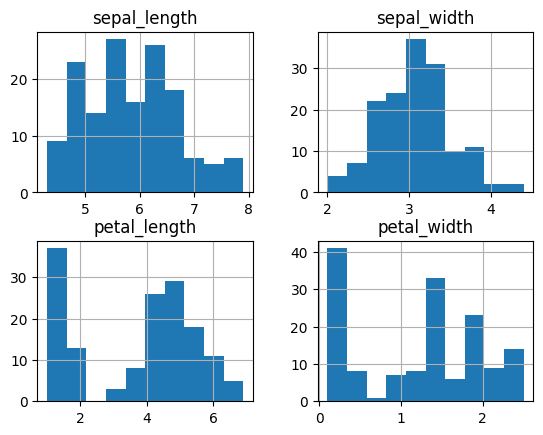

In [66]:

# Inspect histogram by numerical column
df['sepal_length'].hist()

# Inspect histograms for all numerical columns
df.hist()

# Show all plots
plt.show()


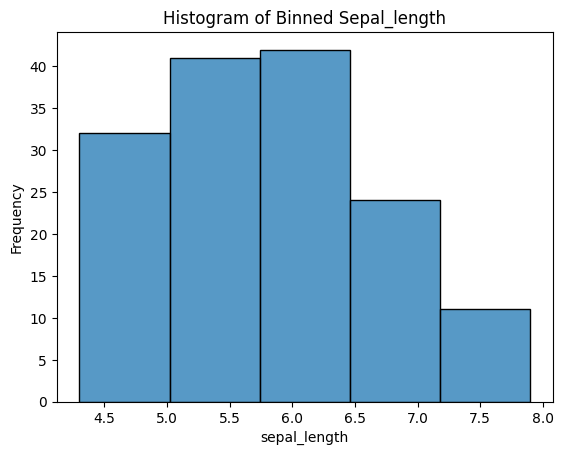

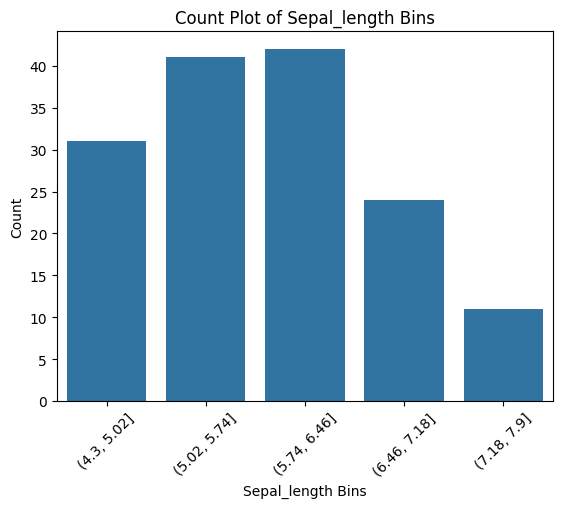

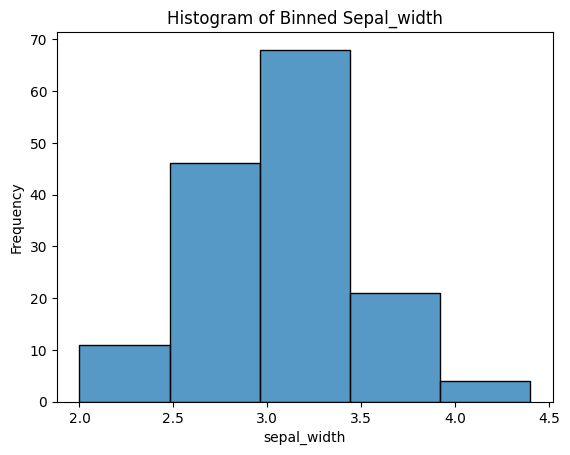

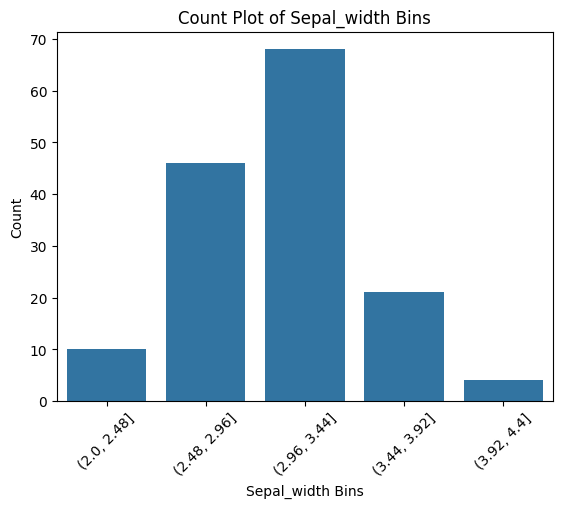

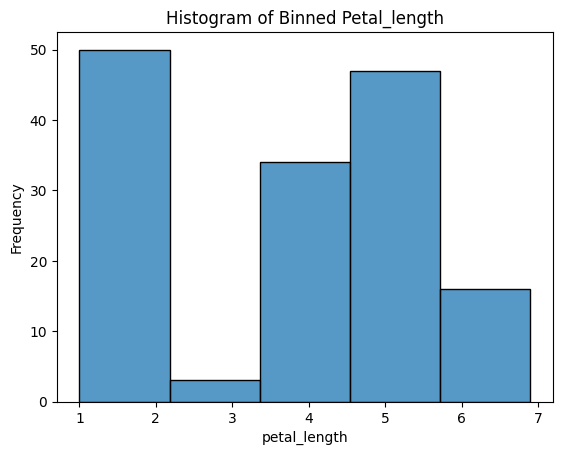

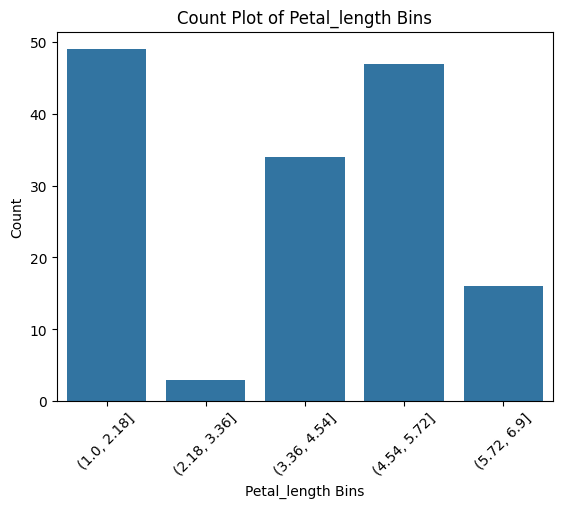

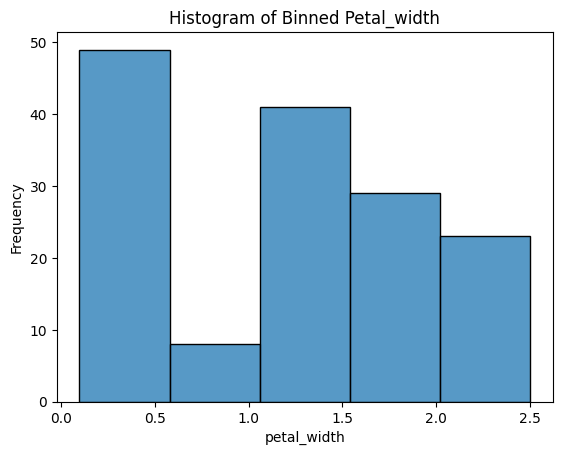

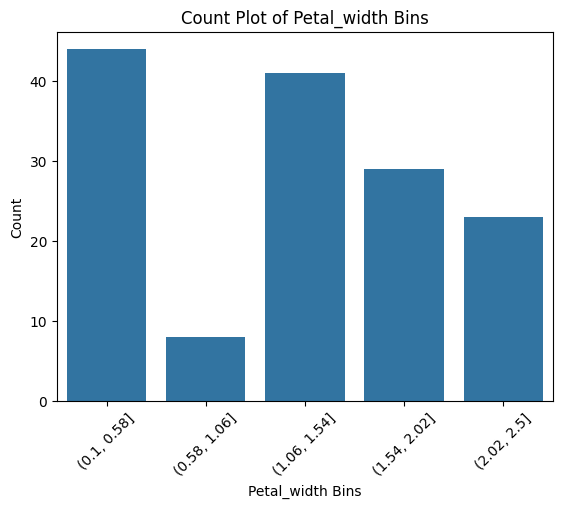

In [67]:
#Binning the datga

import numpy as np

# Load Iris dataset
iris = sns.load_dataset('iris')

# Function to calculate bins dynamically based on column range
def create_bins(column, num_bins=5):
    min_value = column.min()
    max_value = column.max()
    return np.linspace(min_value, max_value, num_bins + 1)

# Loop through all numerical columns and apply binning with dynamic ranges
for column in iris.select_dtypes(include=['float64', 'int64']).columns:
    # Create dynamic bins for each column
    bins = create_bins(iris[column], num_bins=5)
    
    # Create a new column for the binned data
    iris[f'{column} Binned'] = pd.cut(iris[column], bins=bins)

    # Plot histogram
    sns.histplot(data=iris, x=column, bins=bins, kde=False)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Binned {column.capitalize()}')
    plt.show()

    # Plot count plot for the binned column
    sns.countplot(data=iris, x=f'{column} Binned')
    plt.xlabel(f'{column.capitalize()} Bins')
    plt.ylabel('Count')
    plt.title(f'Count Plot of {column.capitalize()} Bins')
    plt.xticks(rotation=45)
    plt.show()

    

#####  Obervations  
Overall, the data is mostly symetric which tells us that the distribution is centralized or balanced.  There are some areas of the petal width and petal length which could indicate some outliers.


###   Initial Data Distribution for Categorical Columns

Value counts for column: species
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64



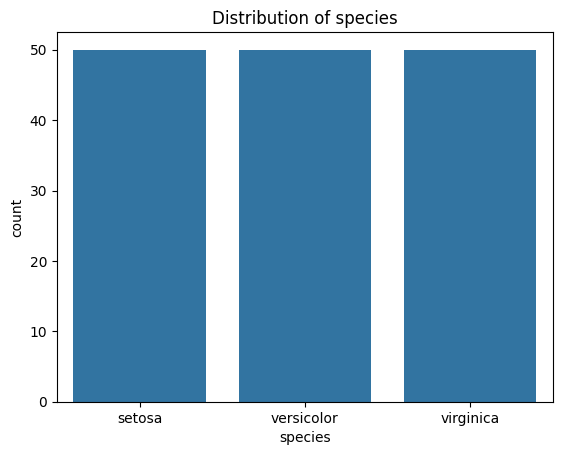

In [68]:
# Inspect value counts by categorical column
df['species'].value_counts()

# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f'Value counts for column: {col}')
    print(df[col].value_counts())
    print()
    # Display count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Show all plots
plt.show()


Value counts for the categorical columns setosa, versicolor, virginica are all identical (50). 

### Initial Data Cleaning

#### Check for outliers using box plots

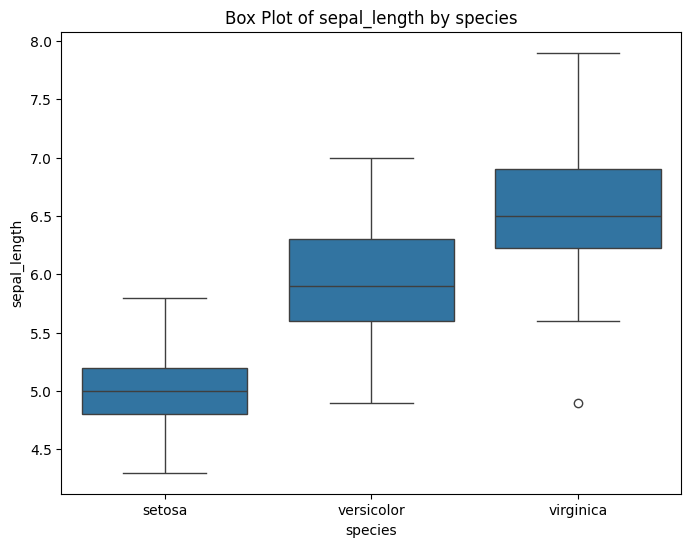

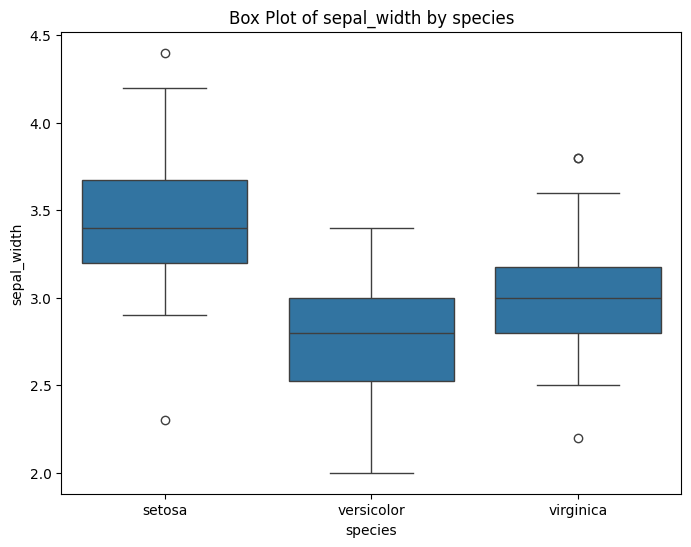

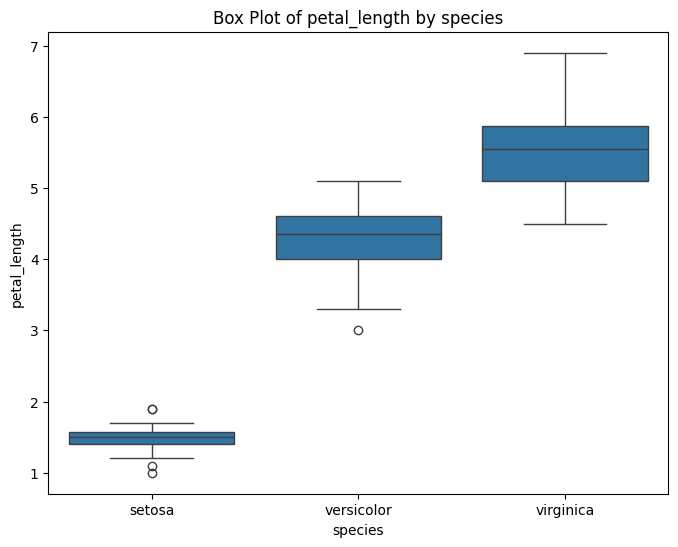

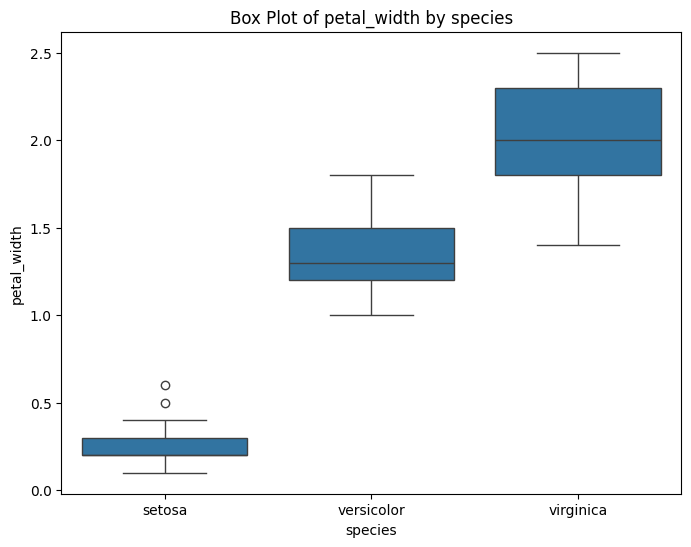

In [69]:
# List of categorical and numerical columns
categorical_column = 'species'  # Replace with your categorical column name
numerical_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for num_col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=categorical_column, y=num_col, data=df)  # Create box plot
    plt.title(f'Box Plot of {num_col} by {categorical_column}')  # Set title for each plot
    plt.show()  # Display the plot

The box plots indicate that there are some outliers in the data. 

####  Check for missing values

In [70]:

df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Initial Data Transformation and Feature Engineering

In [71]:

#Renaming specific numerical columns with custom names

# Define a dictionary mapping old column names to new names
new_column_names = {
    'sepal_length': 'Sepal Length',
    'sepal_width': 'Sepal Width',
    'petal_length': 'Petal Length',
    'petal_width': 'Petal Width'
}

# Rename the columns in the DataFrame using the dictionary
df.rename(columns=new_column_names, inplace=True)

# Display the updated DataFrame column names to verify the changes
print(df.columns)

# Adding a new column
df['Sepal Area'] = df['Sepal Length'] * df['Sepal Width']

df['Petal Area'] = df['Petal Length'] * df['Petal Width']

Index(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width',
       'species'],
      dtype='object')


### Initial Visualizations

#### Scatterplot

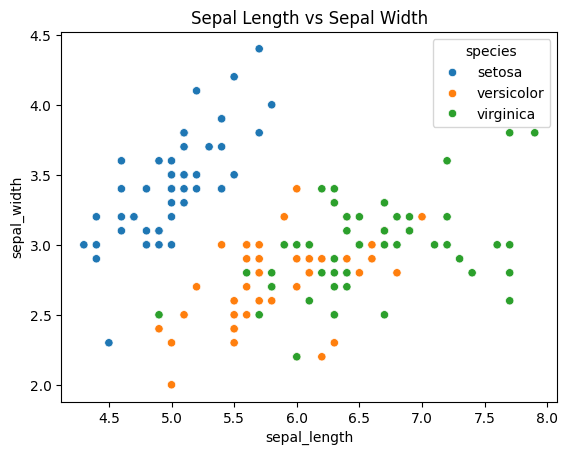

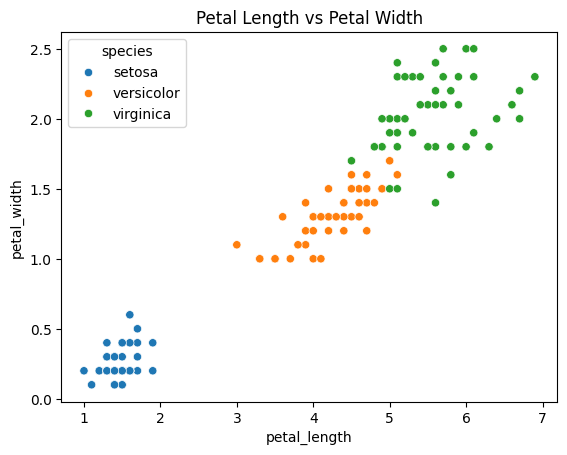

In [72]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris)
plt.title('Sepal Length vs Sepal Width')
plt.show()

sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=iris)
plt.title('Petal Length vs Petal Width')
plt.show()

The scatterplot indicates that the setosa species has a much smaller width and length than the other species.

#### Pair Plot

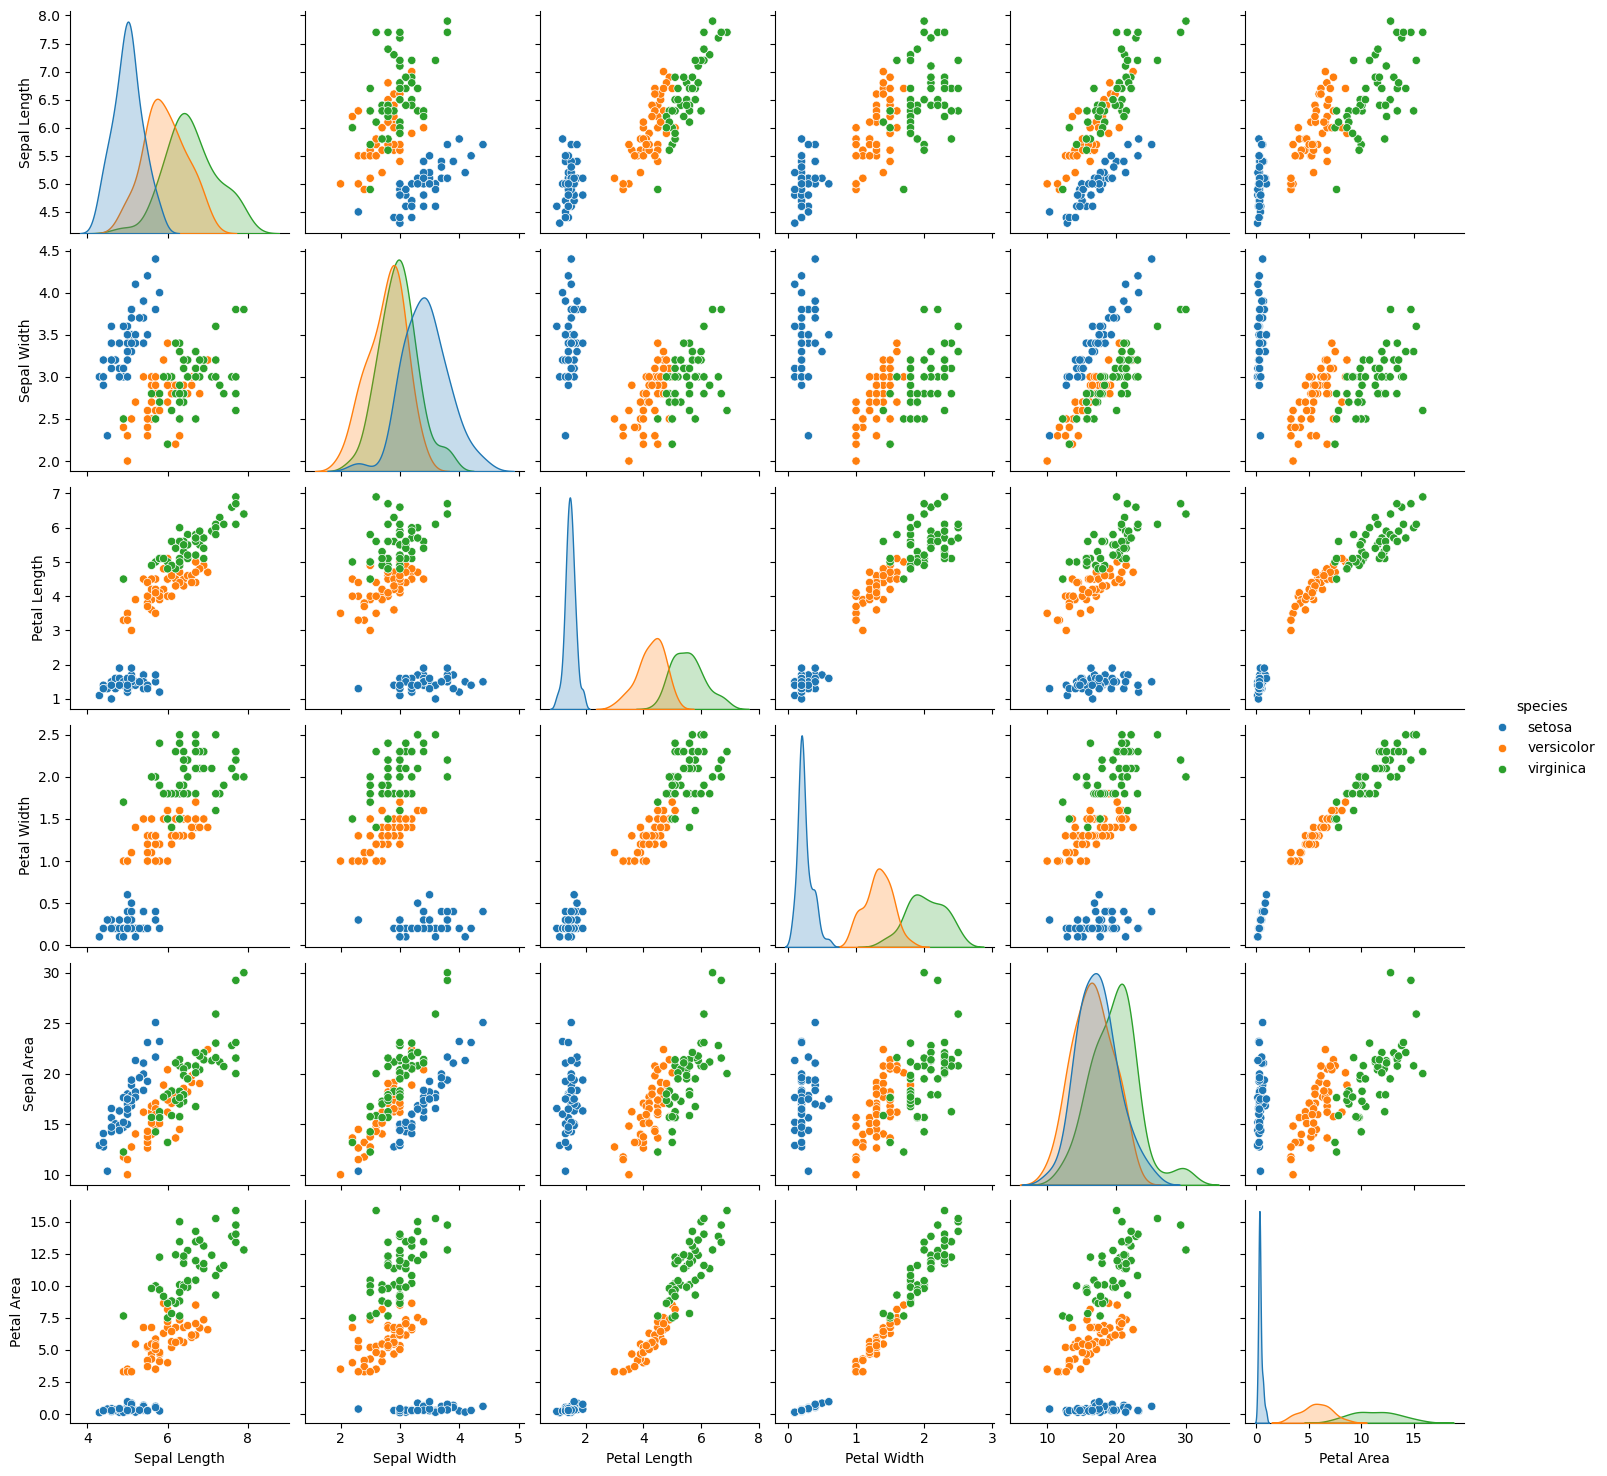

In [73]:
sns.pairplot(df, hue='species')
plt.show()


At a glance you can tell that setosa is very different from the other two species.  In almost all of the plots above the setosa species tends to be separated from the versicolor and virginica species.

####  Correlation Matrix Heatmap

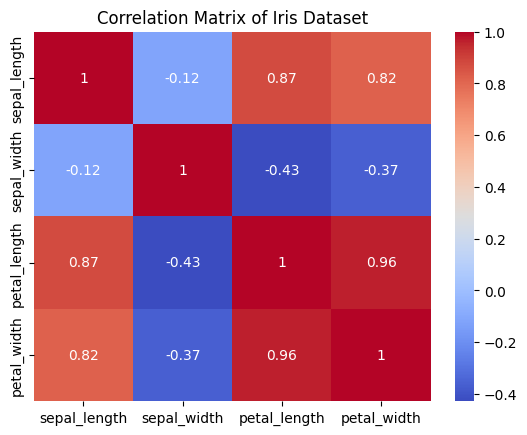

In [74]:
# Exclude the 'species' column, as it's non-numerical
iris_numeric = iris.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numerical columns
corr = iris_numeric.corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Iris Dataset')
plt.show()


+1: Perfect positive linear relationship (as one variable increases, the other increases proportionally).  
-1: Perfect negative linear relationship (as one variable increases, the other decreases proportionally).  
0: No linear relationship between the variables.  

This heatmap is showing that there is a positive linear relationship between petal width and petal length.  Petal legnth and sepal legth also show a possitive relationship.

#### Joint Plot

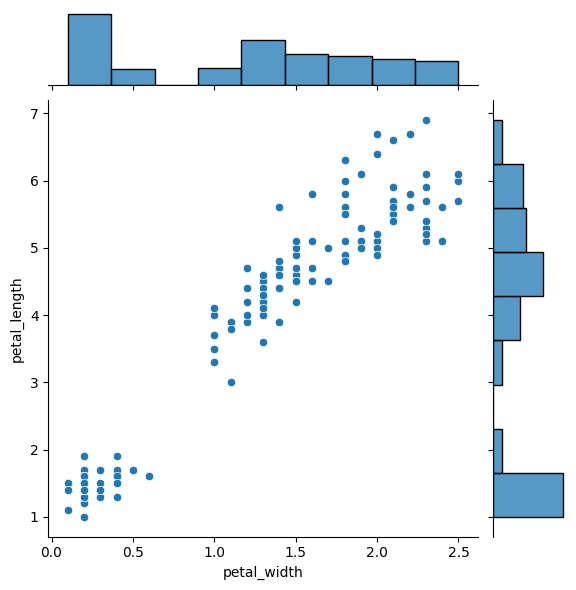

In [75]:
sns.jointplot(x='petal_width', y='petal_length', data=iris, kind='scatter')
plt.show()

This joint plot is showing the same thing as the heatmap with petal width showing a positive relationship with petal length.  Meaning that as petal length increases, so does petal width.

### Conclusion
-Petal length and petal width vary more acorss the three species than sepal length and width  
-The setosa species tends to be a much smaller iris as far as petal size is concerned  
-The versicolor and virginica species are harder to differentiate from each other  
-Petal Length and Petal Width show a strong positive correlation meaning as the petal length increases so does the petal width  
-Sepal Length and Sepal Width do not show a correlation between each other
